<h1 align="center">CAMNS Method Demo</h1>

> The original paper can be found [here](https://www.researchgate.net/profile/Chong-Yung-Chi/publication/251134144_A_Convex_Analysis_Framework_for_Blind_Separation_of_NonNegative_Sources/links/5a1e7622aca272cbfbc04995/A-Convex-Analysis-Framework-for-Blind-Separation-of-NonNegative-Sources.pdf)

## The problem

The task is blind source separation (BSS) of non-negative source signals. 

Let $N$ - number of sources and $S = [s_1, \ldots, s_N] \in \mathbb{R}^{N \times L}$ - an array of source vectors of length $L$ (flatten images in our case). 
Let $\Omega \in \mathbb{R}^{M \times N}$ - a mixture matrix, where
- $M$ - a number of real observations
- $\forall i \in \{1,\ldots,M\}:\, \sum_{j=1}^{N} \Omega_{i,j} = 1$

So, the observations we have are derived as a product of mixture matrix by sources:
$$
    X = \Omega S
$$

Given:
- $[x_1, \ldots, x_M]$ - array of observations

Want to get:
- $[s_1, \ldots, s_N]$ - sources.

## Assumptions

The CAMNS algorithm works correctly under certain assumptions:

- $\forall i \in \{1,\ldots,N\}:\, s_i \in \mathbb{R}_{+}^{L}$
- Each source vector is _local dominant_: $\forall i \in \{1,\ldots,N\}\,\exists l_i\hookrightarrow s_i[l_i] = 1,\,\text{and}\,\, s_j[l_i] = 0\,(\forall j \neq i)$
- $\forall i \in \{1,\ldots,M\}:\, \sum_{j=1}^{N} \Omega_{i,j} = 1$
- $M \geq N$ and $\Omega$ is of full column rank

## Practice

Let's dive into practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.camns import CAMNS
%load_ext autoreload
%autoreload 2

In [2]:
def load_image(path):
    print('Loading {}'.format(path))
    
    # Load image.
    image = plt.imread(path)

    # Leave only red channel.
    if len(image.shape) > 2:
        image = np.delete(image, range(1, image.shape[2]), axis=2)
    
    # [0, 255] -> [0, 1]
    image = image.astype(np.float64) / 255.0
    
    # Flatten.
    image = image.reshape(128 * 128)
    return image


def load_images(paths):
    images = []
    for path in paths:
        images.append(load_image(path))
    return images


def plot_images(images, save_path=None):    
    n_images = len(images)
    fig, ax = plt.subplots(1, n_images, figsize=(4 * n_images, 4))
    
    for i, image in enumerate(images):
        image2d = image.reshape(128, 128)
        ax[i].imshow(image2d, cmap=plt.cm.gray)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
    if save_path is not None:
        fig.savefig(save_path)

---

We will use some [Lapenko](https://www.youtube.com/channel/UC3P2xNP1eppZFwCYUS7qD7Q) character images as our sources.

Loading data/inzsh.png
Loading data/journalist.png
Loading data/sapogov.png
Loading data/gvidon.png
Loading data/zshilin.png
Loading data/glavar.png


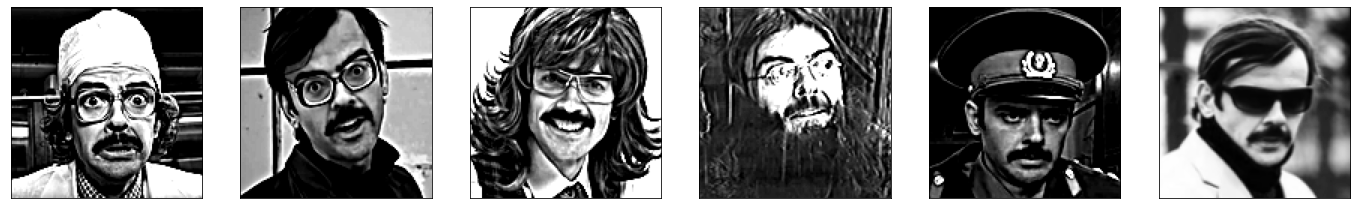

In [3]:
paths = [
    'data/inzsh.png',
    'data/journalist.png',
    'data/sapogov.png',
    'data/gvidon.png',
    'data/zshilin.png',
    'data/glavar.png',
]

images = load_images(paths)
plot_images(images, save_path='img/sources.png')

---

Let's generate a random mixture matrix and mix these images.

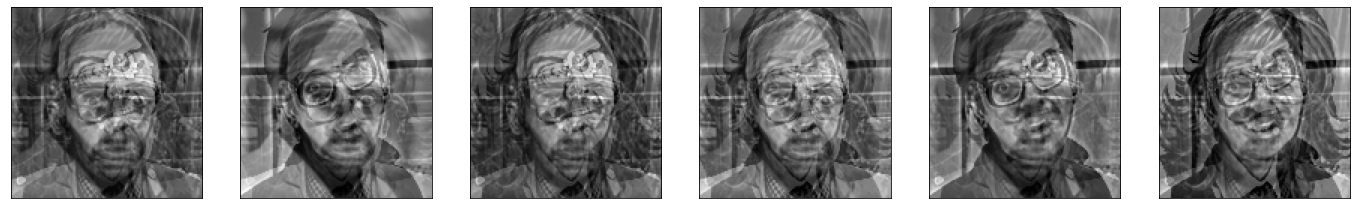

In [4]:
N = len(images)
NUM_OBSERVATIONS = N

A = np.random.rand(NUM_OBSERVATIONS, N)
MIX = (A / np.sum(A, axis=1, keepdims=True))

X = MIX.dot(images)

plot_images(X, save_path='img/shuffled.png')

---

Now let's use CAMNS method to extract sources. The method is implemented and documented inside [camns.py](https://github.com/Shishqa/CAMNS/blob/main/src/camns.py) file.

epoch #1:
	2 new vectors
	total number of vectors: 2
	8.413538455963135s elapsed
epoch #2:
	1 new vectors
	total number of vectors: 3
	9.321054220199585s elapsed
epoch #3:
	1 new vectors
	total number of vectors: 4
	8.970152378082275s elapsed
epoch #4:
	1 new vectors
	total number of vectors: 5
	9.139052629470825s elapsed
epoch #5:
	1 new vectors
	total number of vectors: 6
	15.24199628829956s elapsed
finished after 51.13292121887207s


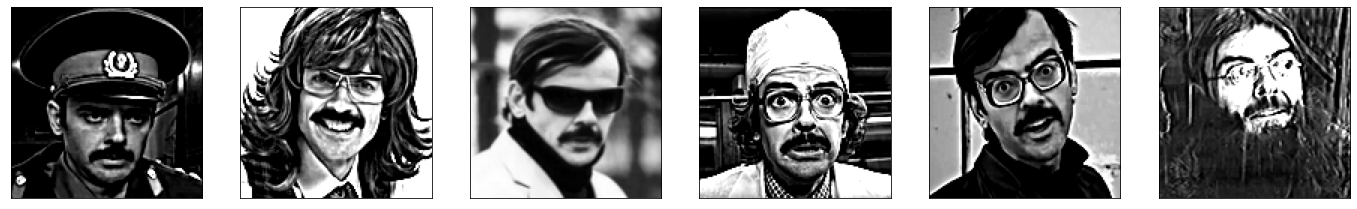

In [5]:
S = CAMNS(X, N)
plot_images(S, save_path='img/extracted.png')

As we can see, the method did well and extracted all the sources quite precisely!